# Linear Regression
The linear regression model as described in the README.md file will be used to predict CO2 emission levels from transport in each country based on various transit and socioeconomic related metrics.

To use linear regression, I will first assess the correlation between metrics such as air transport, rail transport, railway passengers carried, and quality of different kinds of transport along with GDP per capita, population density, etc. I will use the two independent variables with the highest correlation to predict CO2 emissions levels using linear regression. Some metrics, like CO2 emissions per GDP, or fossil fuel consumptions are very similar to the dependent variable and will be excluded.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Cleaning Up Data + Isolating Important Metrics

In [2]:
#read csv file with all country transit and socioeconomic data
df = pd.read_csv("CountryData.csv")

In [3]:
# clean up data file

# dependent variable: Total world transport-related GHG emissions
# isolate the following independent variables:
#		Total passengers on air transport
#		Total railway passengers
#		Mortality caused by road traffic injury
#		PM2.5 air pollution, mean annual exposure
#		Quality of air transport infrastructure
#		Quality of port infrastructure
#		Quality of railroad infrastructure
#		Quality of roads
#		GDP per capita
#		Population of the largest city
#		Population density
#		Percent population using the internet

row_ind = [1, 19, 9, 10, 12, 14, 16, 18, 22, 23, 27, 28, 20]
col_filled = ~df.loc[row_ind].isin([".."]).any() # only keep countries with nonempty rows

fil_df = df.loc[row_ind, col_filled] # create new data table with isolated rows
fil_df.head()

,Time,Time Code,Indicator Name,Indicator Code,Albania [ALB],Algeria [DZA],Argentina [ARG],Armenia [ARM],Austria [AUT],Azerbaijan [AZE],...,Saudi Arabia [SAU],Serbia [SRB],Spain [ESP],Switzerland [CHE],Thailand [THA],Tunisia [TUN],Turkey [TUR],United Kingdom [GBR],United States [USA],Vietnam [VNM]
1,2013,YR2013,"Air transport, passengers carried",IS.AIR.PSGR,865848,4492437,11951277,45000,15037454,1651710,...,28252104,1241352,48056736,27503416,43029151,4648608,74413805,118605866,743171000,20429310
19,2013,YR2013,"Railways, passengers carried (million passenge...",IS.RRS.PASG.KM,32,1040,8588,50,10749,591,...,297,777,23815,17997,7504,1534,3775,65928,9518,4558
9,2013,YR2013,Mortality caused by road traffic injury (per 1...,EST.ROAD.TRAF.DTH.100G,15,24,14,18,5,10,...,27,8,4,3,36,24,9,3,11,25
10,2013,YR2013,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,15.642,31.108,13.621,24.799,15.916,26.323,...,125.709,19.868,9.76,12.092,25.07,35.873,33.052,12.29,8.528,27.823
12,2013,YR2013,Quality of air transport infrastructure [value...,QA.AIR.TRANS.IN,4.31,3.01,3.56,4.53,5.4,5.1,...,5.42,3.3,6.04,6.18,5.53,4.53,5.53,5.61,5.95,4.04


### Checking Correlation of Metrics

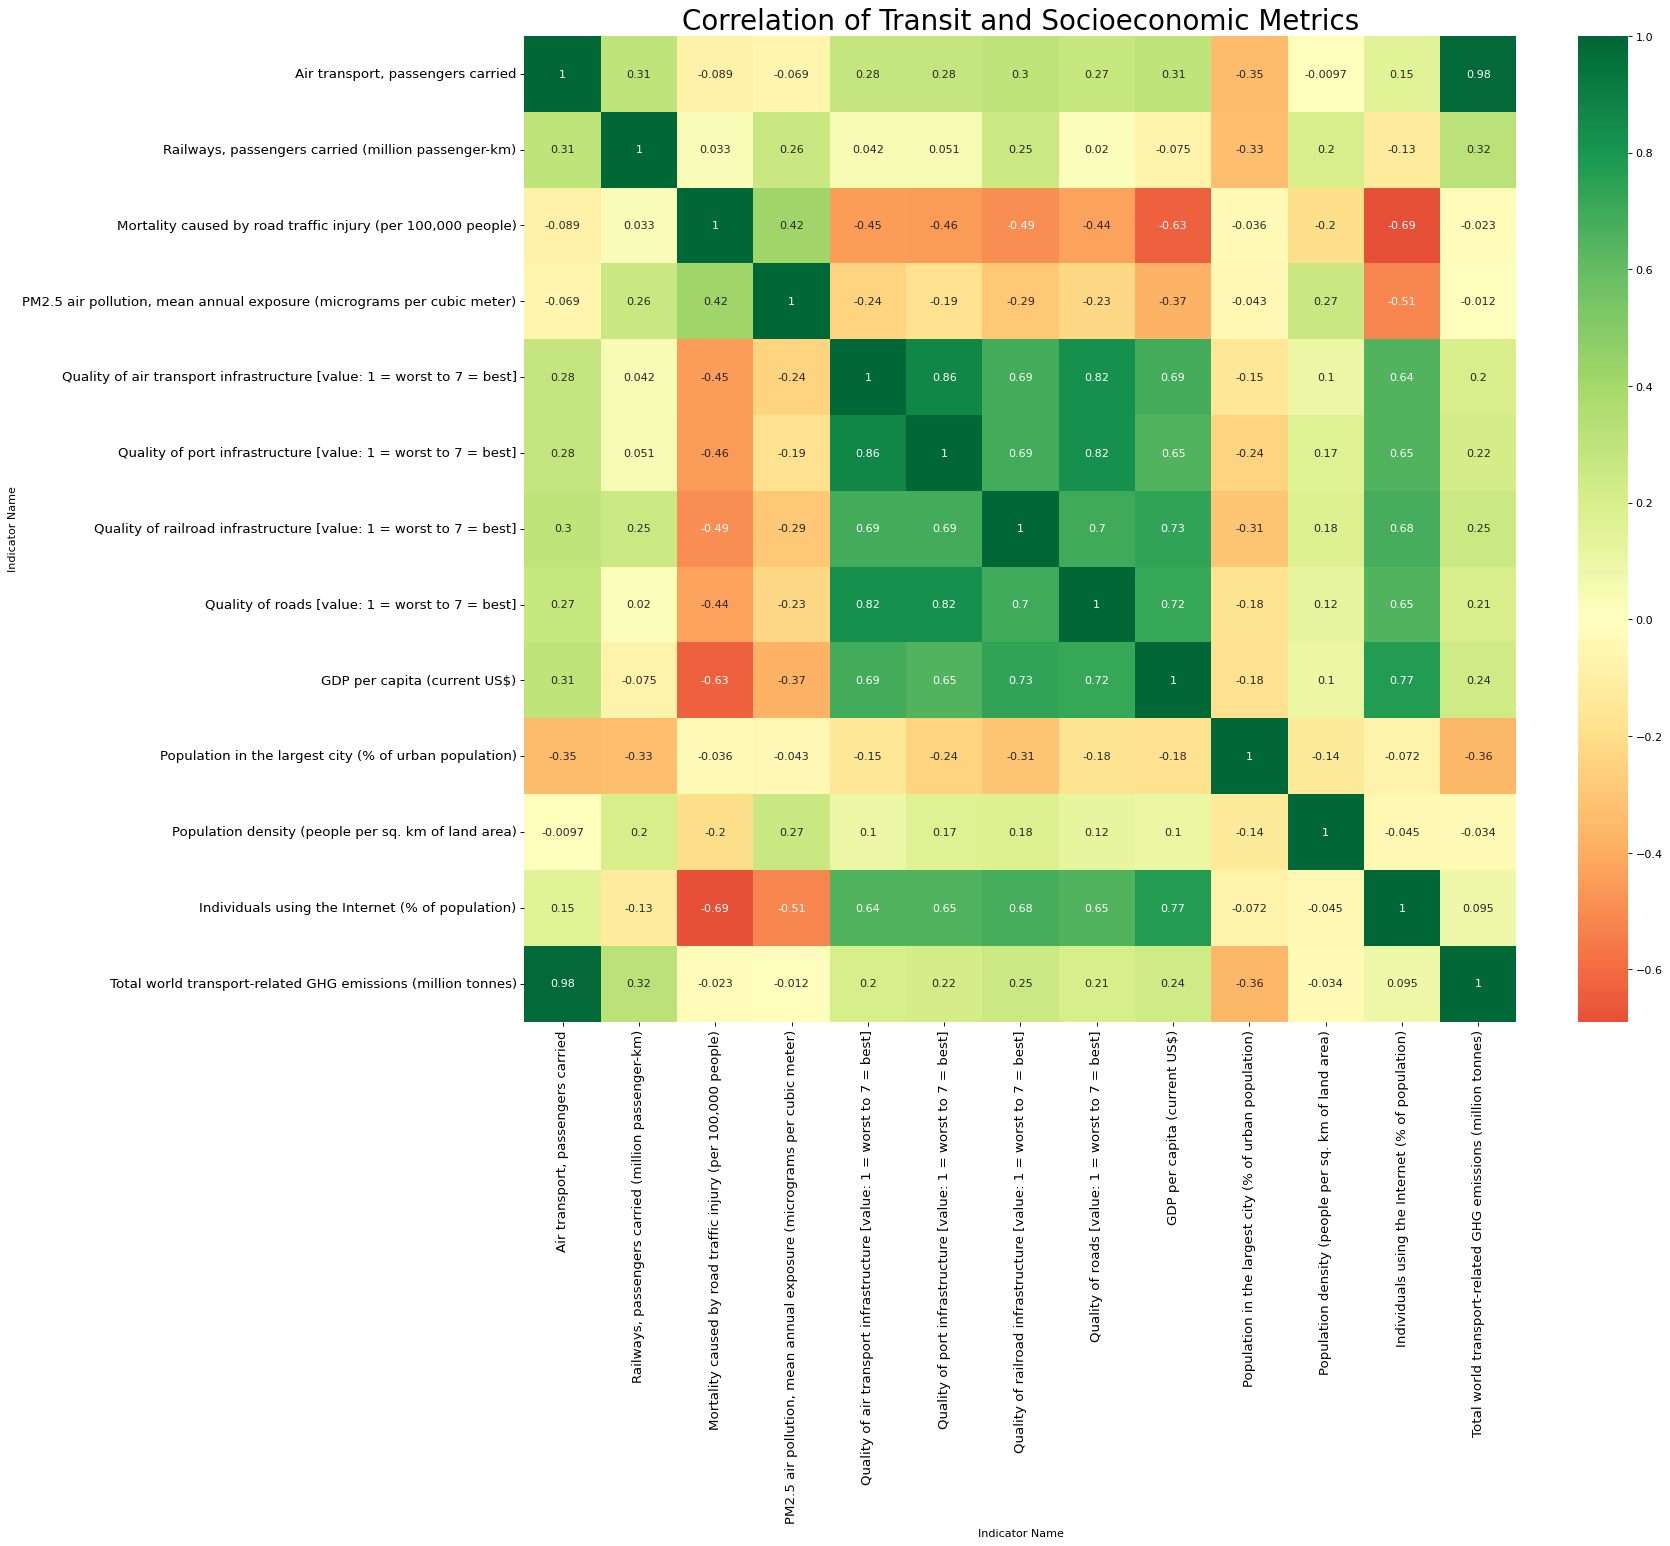

In [4]:
# transform data file and delete time/labels for correlations
df_transposed = fil_df.T
df_transposed.columns = df_transposed.iloc[2]
df_corr = df_transposed.iloc[4:,:]
df_corr = df_corr.astype(float)

# plot correlation chart
plt.figure(figsize=(20,16), dpi= 80)
sns.heatmap(df_corr.corr(), xticklabels=df_corr.corr().columns, yticklabels=df_corr.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation of Transit and Socioeconomic Metrics', fontsize=25)
plt.show()

From the correlation chart, it is evident that the number of passengers carried on air transport, the population in the largest city, and the number of passengers carried on railways are the most correlated to total world transport-related greenhouse gas (GHG) emissions. This makes sense, as airplanes are one of the forms of transit known to contribute most to GHG emissions. The next two metrics have weak correlations with GHG emissions. The slight negative relationship between population in the largest city and GHG emissions is interesting, as one guess could be that the more people live in the largest city, the more likely it is for the country or city to establish a robust public transit system. As a result, less people are driving and more people are taking public transit. The number of railway passengers could be related to GHG emissions the same way air transport is, but trains are known to contribute much less to GHG emissions. One notable relationship between the variables is the mortality caused by traffic injury and individuals using the internet. Here, countries with more individuals that use the internet has fewer mortalities caused by road traffic. This actually shows the opposite effect of distracted driving, but could just be a spurious correlation.

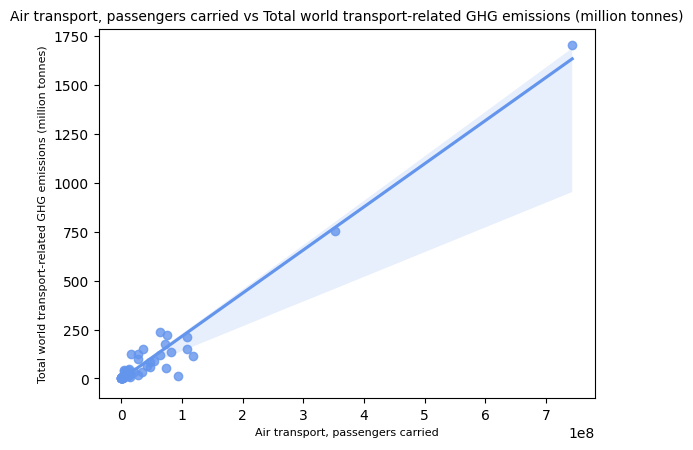

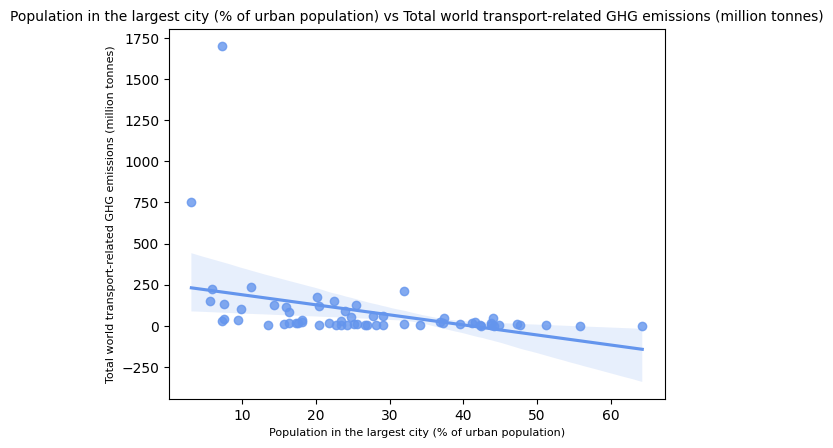

In [47]:
# visualize correlations for three metrics
for i in [0, 9]:
	plt.figure()
	sns.regplot(x=df_corr.iloc[:, i], y=df_corr.iloc[:, 12], color = "cornflowerblue")
	plt.xlabel(df_corr.columns[i], fontsize=8)
	plt.ylabel(df_corr.columns[12], fontsize=8)
	plt.title(f'{df_corr.columns[i]} vs {df_corr.columns[12]}', fontsize=10)

### Linear Regression

We will now select the two most correlated metrics, total air transit passengers and population of the largest city to run our linear regression model on. Because the correlation between total air transit passengers and total GHG emissions is strong, it is expected that we may obtain better predictions from the model. On the other hand, the correlation between population of the largest city in a country is weak, so the expectation is that the linear regression model will output poor or random predictions.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [40]:
# prepare data for linear regression
row_ind_lin = [1, 23, 20]
col_filled_lin = ~df.loc[row_ind_lin].isin([".."]).any() # only keep countries with nonempty rows

df_lin = df.loc[row_ind_lin, col_filled_lin] # create new data table with isolated rows
df_linT = df_lin.T
df_linT.columns = df_linT.iloc[2]
df_linreg = df_linT.iloc[4:,:]
df_linreg = df_linreg.astype(float)
df_linreg.head()

Indicator Name,"Air transport, passengers carried",Population in the largest city (% of urban population),Total world transport-related GHG emissions (million tonnes)
Albania [ALB],865848.0,26.977777,2.5
Algeria [DZA],4492437.0,9.454757,37.4
Angola [AGO],1321872.0,39.445842,8.5
Argentina [ARG],11951277.0,37.404692,47.4
Armenia [ARM],45000.0,55.807632,1.3


In [41]:
# split X and y + train/test data

# split X and target y
X = df_linreg.iloc[:,0:2]
y = df_linreg.iloc[:,2]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [42]:
# create linear regression object
linreg = LinearRegression()

### Linear Regression: Air Transit Passengers Carried

In [48]:
# air transit passengers
X_air = np.array(X_train.iloc[:,0]).reshape(-1,1)
y_air = np.array(y_train).reshape(-1,1)

# fit on training data and get predictions
linreg.fit(X_air, y_air)
y_pred_air = linreg.predict(X_air)

# assess training fit
train_rmse = np.sqrt(mean_squared_error(y_air, y_pred_air))
train_r2 = r2_score(y_air, y_pred_air)

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Train R² Score: {train_r2:.2f}")


Train RMSE: 33.90
Train R² Score: 0.90


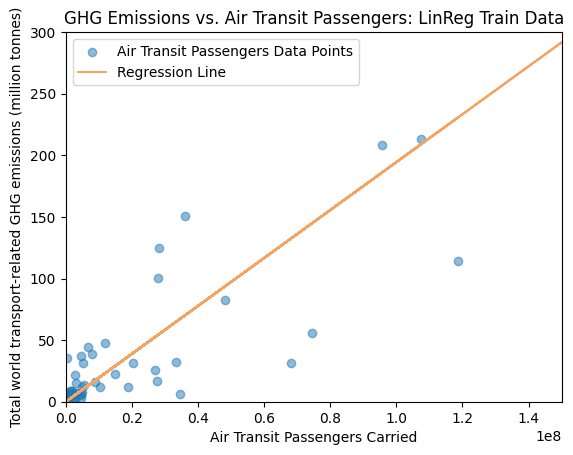

In [56]:
# linear regression on train data
plt.figure()
plt.scatter(X_air, y_air,alpha=0.5, label = 'Air Transit Passengers Data Points') # data points
plt.plot(X_air, y_pred_air, color = 'sandybrown', label = 'Regression Line') # regression line
plt.xlim(0,1.5e8)
plt.ylim(0,300)
plt.legend()
plt.title('GHG Emissions vs. Air Transit Passengers: LinReg Train Data')
plt.xlabel('Air Transit Passengers Carried')
plt.ylabel('Total world transport-related GHG emissions (million tonnes)')
plt.show()

In [52]:
# air transit passengers: apply linear regression model to test data
Xair_test = np.array(X_test.iloc[:,0]).reshape(-1,1)
yair_test = np.array(y_test).reshape(-1,1)
yair_pred_test = linreg.predict(Xair_test) # model predictions on test data

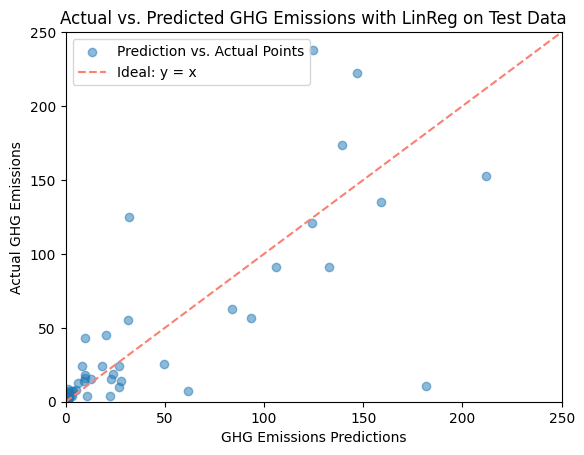

In [53]:
# compare actual vs. linear prediction
fig = plt.figure()
plt.scatter(yair_pred_test, yair_test, alpha=0.5, label = 'Prediction vs. Actual Points')

# plot y=x line to determine accuracy of predictions
min_val = min(min(yair_pred_test), min(yair_test))
max_val = max(max(yair_pred_test), max(yair_test))
plt.plot([min_val, max_val], [min_val, max_val], '--', color = 'salmon', label='Ideal: y = x')

plt.xlim(0,250)
plt.ylim(0,250)
plt.legend()
plt.xlabel('GHG Emissions Predictions')
plt.ylabel('Actual GHG Emissions')
plt.title("Actual vs. Predicted GHG Emissions with LinReg on Test Data")
plt.show()

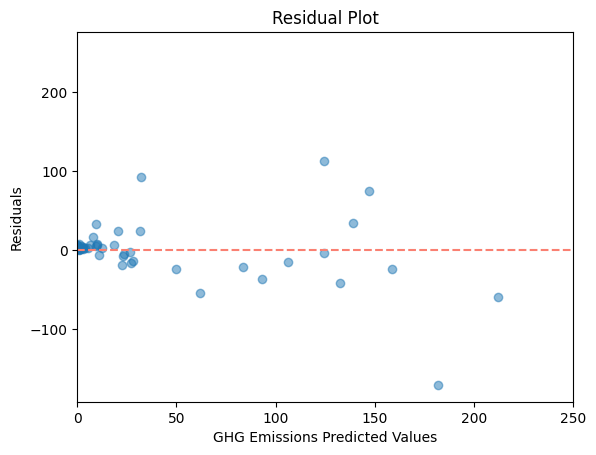

In [29]:
# plot residuals
residuals = yair_test - yair_pred_test
plt.figure()
plt.scatter(yair_pred_test, residuals, alpha=0.5)
plt.xlim(0,250)
plt.axhline(0, color='salmon', linestyle='--')
plt.xlabel('GHG Emissions Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [54]:
# find root mean squared error and R^2 of model on test data
test_rmse = np.sqrt(mean_squared_error(yair_test, yair_pred_test))
test_r2 = r2_score(yair_test, yair_pred_test)

print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test R² Score: {test_r2:.2f}")

Test RMSE: 49.67
Test R² Score: 0.95


### Linear Regression: Population in Largest City

In [55]:
# population of largest city
X_pop = np.array(X_train.iloc[:,1]).reshape(-1,1)
y_pop = np.array(y_train).reshape(-1,1)

# fit on training data and get predictions
linreg.fit(X_pop, y_pop)
y_pred_pop = linreg.predict(X_pop)

trainpop_rmse = np.sqrt(mean_squared_error(y_pop, y_pred_pop))
trainpop_r2 = r2_score(y_pop, y_pred_pop)

print(f"Train RMSE: {trainpop_rmse:.2f}")
print(f"Train R² Score: {trainpop_r2:.2f}")

Train RMSE: 102.14
Train R² Score: 0.10


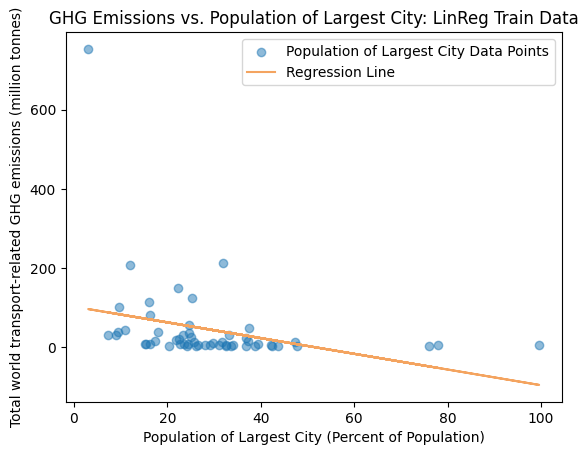

In [57]:
# linear regression on train data
plt.figure()
plt.scatter(X_pop, y_pop, alpha=0.5, label = 'Population of Largest City Data Points') # data points
plt.plot(X_pop, y_pred_pop, color = 'sandybrown', label = 'Regression Line') # regression line
#plt.xlim(0,1.5e8)
#plt.ylim(0,300)
plt.legend()
plt.title('GHG Emissions vs. Population of Largest City: LinReg Train Data')
plt.xlabel('Population of Largest City (Percent of Population)')
plt.ylabel('Total world transport-related GHG emissions (million tonnes)')
plt.show()

In [58]:
# total pop of largest city: apply linear regression model to test data
Xpop_test = np.array(X_test.iloc[:,1]).reshape(-1,1)
ypop_test = np.array(y_test).reshape(-1,1)
ypop_pred_test = linreg.predict(Xpop_test)

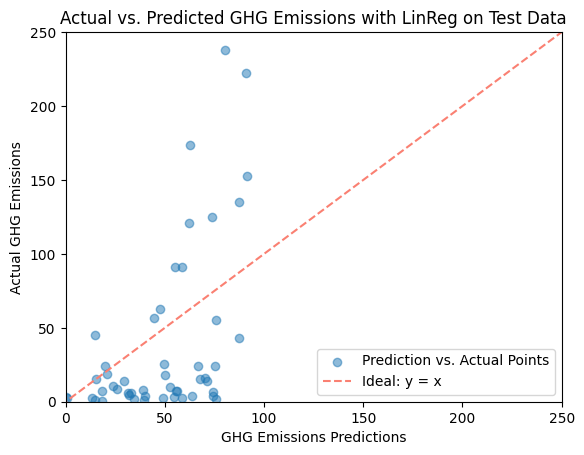

In [59]:
# actual vs. prediction on test
fig = plt.figure()
plt.scatter(ypop_pred_test, ypop_test, alpha=0.5, label = 'Prediction vs. Actual Points') #test data points

# plot y=x line to determine accuracy of predictions
min_val = min(min(ypop_pred_test), min(ypop_test))
max_val = max(max(ypop_pred_test), max(ypop_test))
plt.plot([min_val, max_val], [min_val, max_val], '--', color = 'salmon', label='Ideal: y = x')

plt.xlim(0,250)
plt.ylim(0,250)
plt.legend()
plt.xlabel('GHG Emissions Predictions')
plt.ylabel('Actual GHG Emissions')
plt.title("Actual vs. Predicted GHG Emissions with LinReg on Test Data")
plt.show()

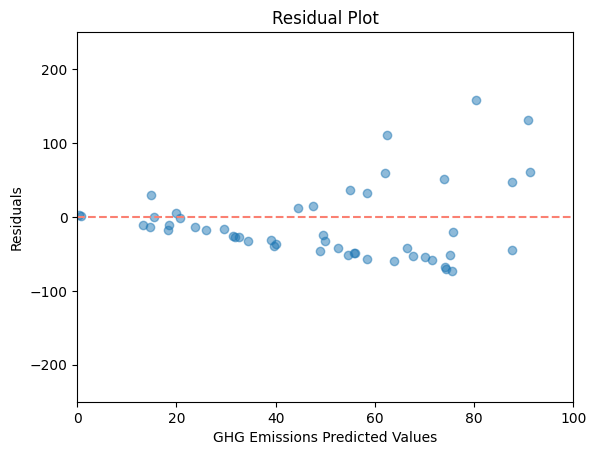

In [37]:
# plot residuals
residualspop = ypop_test - ypop_pred_test
plt.figure()
plt.scatter(ypop_pred_test, residualspop, alpha=0.5)
plt.xlim(0,100)
plt.ylim(-250,250)
plt.axhline(0, color='salmon', linestyle='--')
plt.xlabel('GHG Emissions Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [38]:
# find root mean squared error and R^2
testpop_rmse = np.sqrt(mean_squared_error(ypop_test, ypop_pred_test))
testpop_r2 = r2_score(ypop_test, ypop_pred_test)

print(f"Test RMSE: {testpop_rmse:.2f}")
print(f"Test R² Score: {testpop_r2:.2f}")

Test RMSE: 15108.59
Test R² Score: -4412.34


### Conclusion

Using the linear regression model, we are able to gather more insight on total transport-related GHG emissions of a given country. The metric we assessed, total passengers carried on air transit, is correlated with GHG emissions and so when we use this to make predictions, it closer to actual values and has better predictive power. As mentioned above, this makes sense since air travel has been historically one of the form of transport that produces the highest CO2 emissions. More passengers on airplanes indicates more planes in operation in a certain country, and we can conclude that countries with more developed aviation industries will probably produce more transit-related GHG emissions.

On the other hand, if we use the linear regression model on a metric that is not correlated with GHG emissions, there is little predictive power. The extreme RMSE and R^2 values indicate that these predictions are derived from a model that was not properly fit. To make accurate conclusions using the linear regression model regarding important metrics such as greenhouse gas emissions, it is critical to find metrics that are linearly correlated.